In [1]:
# Imporrting necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
# Loading the dataset
df = pd.read_excel("/content/data.xlsx")
df.shape

(3768, 28)

In [3]:
df.head(5)

,id,version,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,...,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,USER_DEFINED,parameter
0,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,0,U,81036,999,32905,0.087137,0.000408,0.0,9623.101,SEMIMAJOR_AXIS
1,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,0,U,81036,999,32905,0.087137,0.000408,0.0,156.579,PERIOD
2,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,0,U,81036,999,32905,0.087137,0.000408,0.0,5810.636,APOAPSIS
3,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,0,U,81036,999,32905,0.087137,0.000408,0.0,679.295,PERIAPSIS
4,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,0,U,81036,999,32905,0.087137,0.000408,0.0,UNKNOWN,OBJECT_TYPE


In [4]:
df['EPOCH'] = pd.to_datetime(df['EPOCH'])
selected_features = [ "MEAN_MOTION", "ECCENTRICITY", "INCLINATION", "RA_OF_ASC_NODE", "ARG_OF_PERICENTER", "MEAN_ANOMALY", "EPHEMERIS_TYPE", "REV_AT_EPOCH", "BSTAR", "MEAN_MOTION_DOT"]
X = df[selected_features]
print(X.shape)


(3768, 10)


In [5]:
X.head()

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT
0,9.196662,0.266616,66.0607,249.8927,4.3768,357.6084,0,32905,0.087137,0.000408
1,9.196662,0.266616,66.0607,249.8927,4.3768,357.6084,0,32905,0.087137,0.000408
2,9.196662,0.266616,66.0607,249.8927,4.3768,357.6084,0,32905,0.087137,0.000408
3,9.196662,0.266616,66.0607,249.8927,4.3768,357.6084,0,32905,0.087137,0.000408
4,9.196662,0.266616,66.0607,249.8927,4.3768,357.6084,0,32905,0.087137,0.000408


In [6]:
# Applying Standard scalar
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

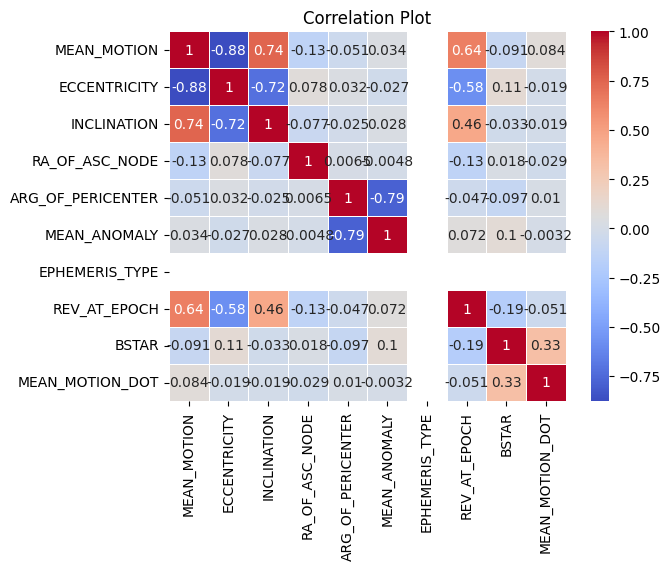

In [7]:
# Correlation plot
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

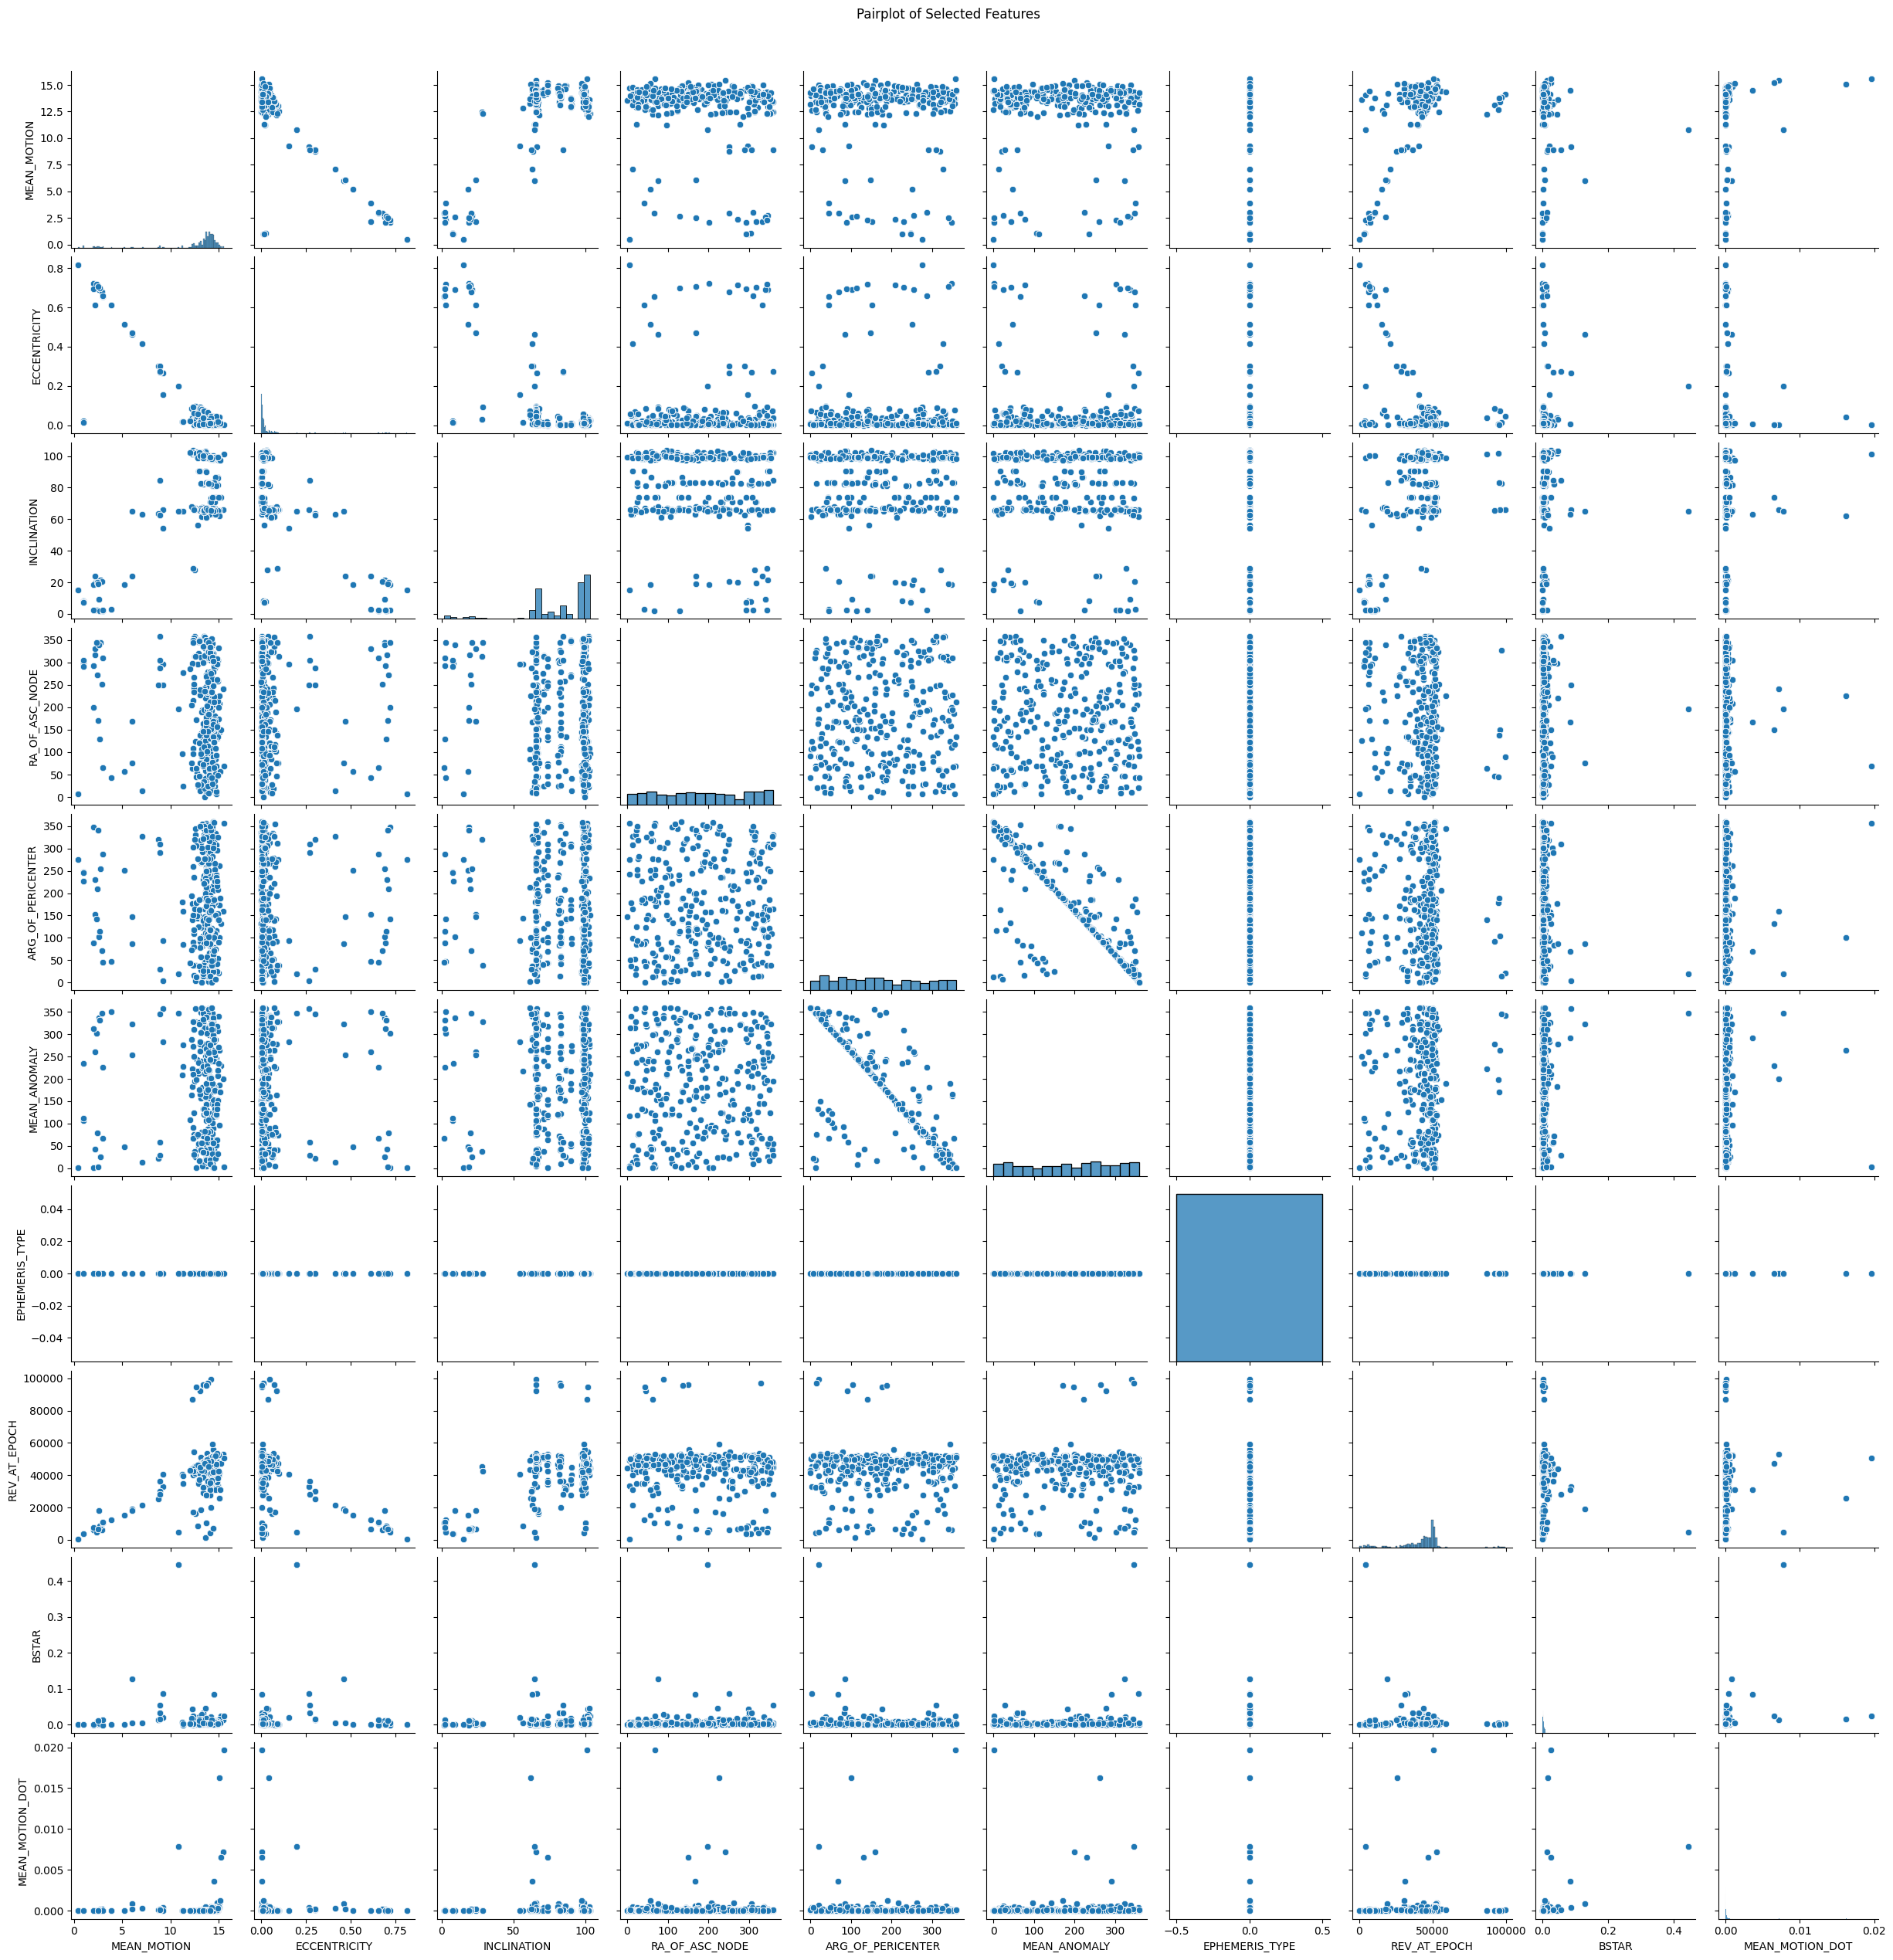

In [8]:
# Scatter plots (pairplot)
sns.pairplot(X)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

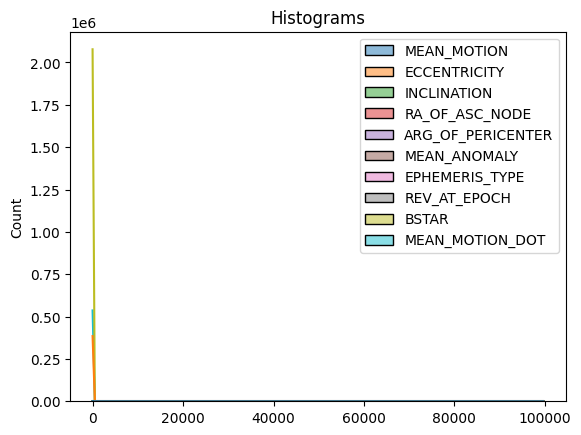

In [9]:
# Histograms
sns.histplot(data=X, kde=True)
plt.title("Histograms")
plt.show()

In [10]:
# Models Creation and training
n_clusters = 5
# Fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_data)
df["Cluster"] = kmeans.labels_
# Calculate the distance of each point to its cluster center
df["Distance"] = kmeans.transform(scaled_data).min(axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Set a threshold for anomaly detection
threshold = 4.0
anomalies = df[df["Distance"] > threshold]
anomalies.head(36)

,id,version,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,...,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,USER_DEFINED,parameter,Cluster,Distance
0,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,9623.101,SEMIMAJOR_AXIS,3,4.199416
1,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,156.579,PERIOD,3,4.199416
2,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,5810.636,APOAPSIS,3,4.199416
3,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,679.295,PERIAPSIS,3,4.199416
4,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,UNKNOWN,OBJECT_TYPE,3,4.199416
5,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,NaN,RCS_SIZE,3,4.199416
6,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,NaN,COUNTRY_CODE,3,4.199416
7,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,NaN,LAUNCH_DATE,3,4.199416
8,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,NaN,SITE,3,4.199416
9,CCSDS_OMM_VERS,2,GENERATED VIA SPACE-TRACK.ORG API,2023-10-10 17:57:55,18 SPCS,TBA - TO BE ASSIGNED,UNKNOWN,EARTH,TEME,UTC,...,81036,999,32905,0.087137,0.000408,0.0,NaN,DECAY_DATE,3,4.199416


In [14]:
anomalies.shape

(36, 30)

In [15]:
import pickle

# Save the trained K-Means model to a file
model_filename = "kmeans_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(kmeans, file)